Author: Aditya Gupte

Institute: IIT Gandhinagar

Date: May 6, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Cuisine_rating.csv')
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [4]:
data.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
locations = data['Location'].unique()
cuisines = data['Cuisines'].unique()
print(locations, "\n", cuisines)

['Upper East Side,NY' 'St. George,NY' 'Upper West Side,NY'
 'Central Park,NY' 'China Town, NY' 'Riverdale,NY' 'Market City, NY'
 'Central Park,ny' 'Market City, MY' 'Cedar Hill, NY'] 
 ['Japanese' 'Indian' 'Seafood' 'Filipino' 'Italian' 'Chinese' 'French']


In [9]:
# match cases of the locations
data['Location'] = data['Location'].replace('Central Park,ny','Central Park,NY')
locations = data['Location'].unique()
print(locations, len(locations))

['Upper East Side,NY' 'St. George,NY' 'Upper West Side,NY'
 'Central Park,NY' 'China Town, NY' 'Riverdale,NY' 'Market City, NY'
 'Market City, MY' 'Cedar Hill, NY'] 9


In [20]:
def plot_counts(feature):
    feature_count = data[feature].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(feature_count.index, feature_count.values)
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f' {feature} Distribution')
    plt.show()

In [21]:
all_features = data.columns
all_features
all_features =all_features.to_list()
all_features

['User ID',
 'Area code',
 'Location',
 'Gender',
 'YOB',
 'Marital Status',
 'Activity',
 'Budget',
 'Cuisines',
 'Alcohol ',
 'Smoker',
 'Food Rating',
 'Service Rating',
 'Overall Rating',
 'Often A S']

#### Different useful features distribution

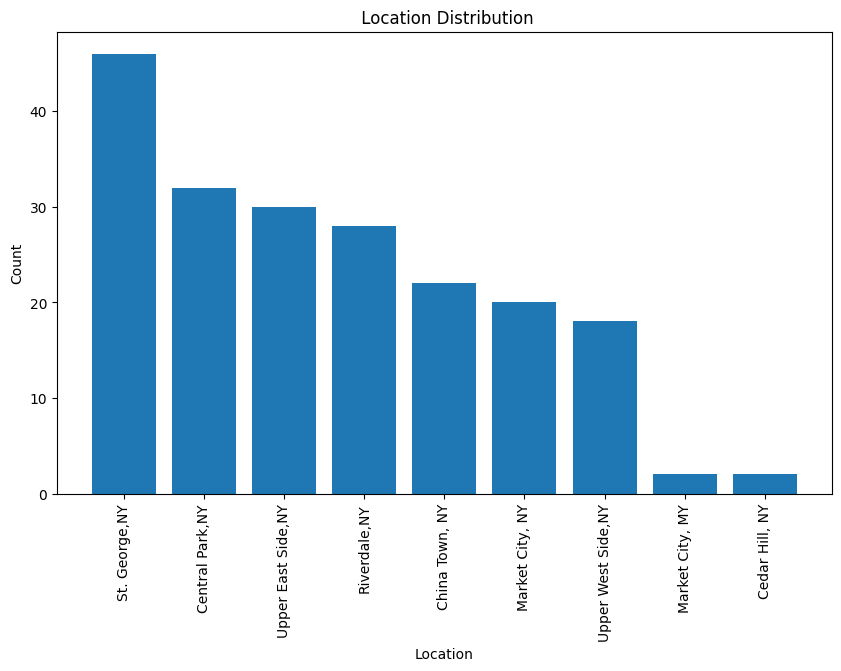

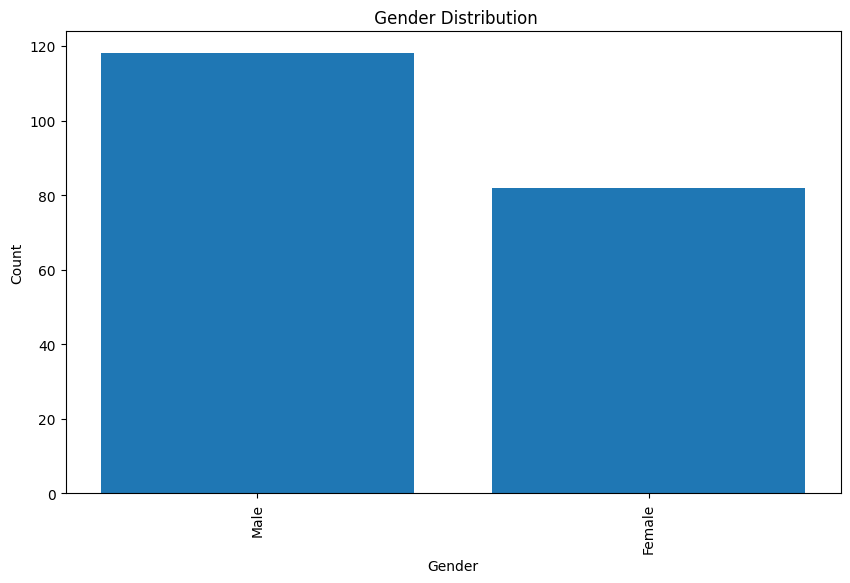

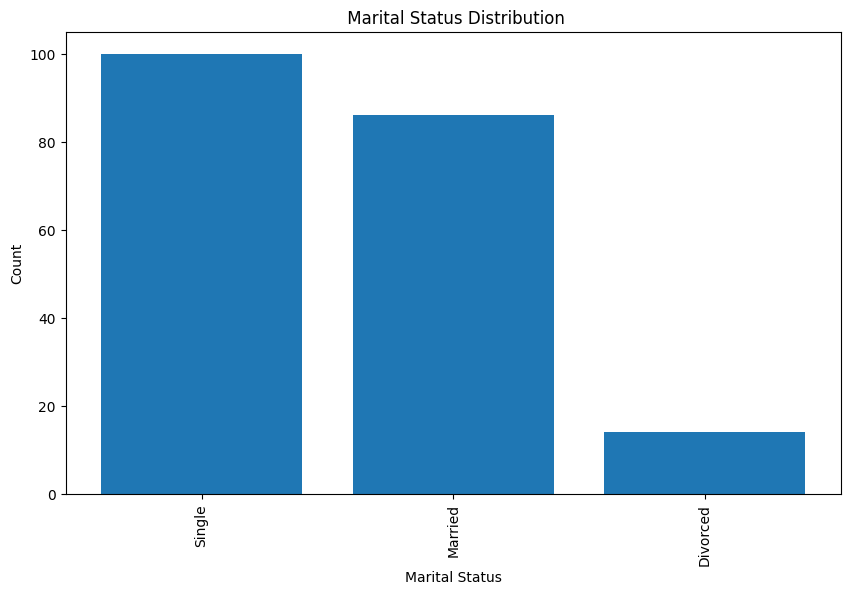

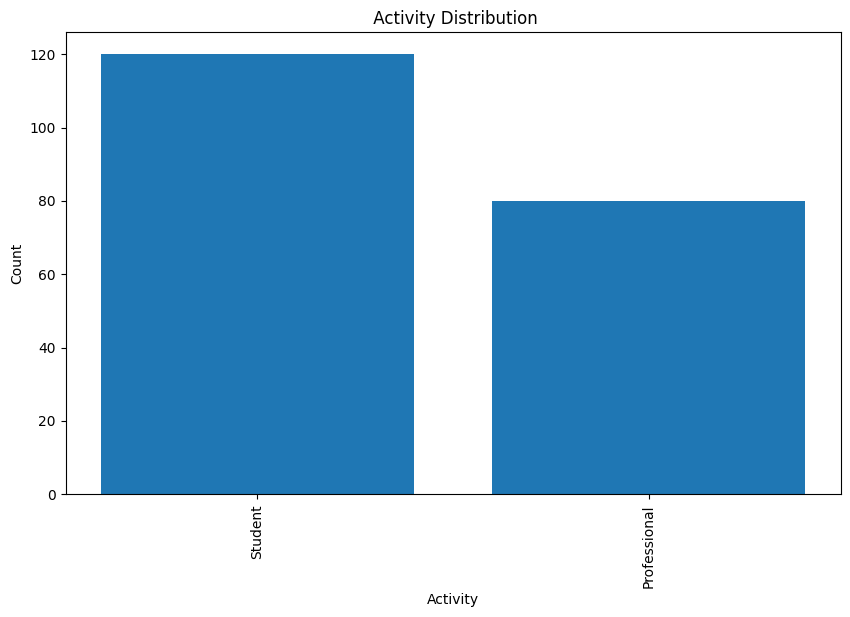

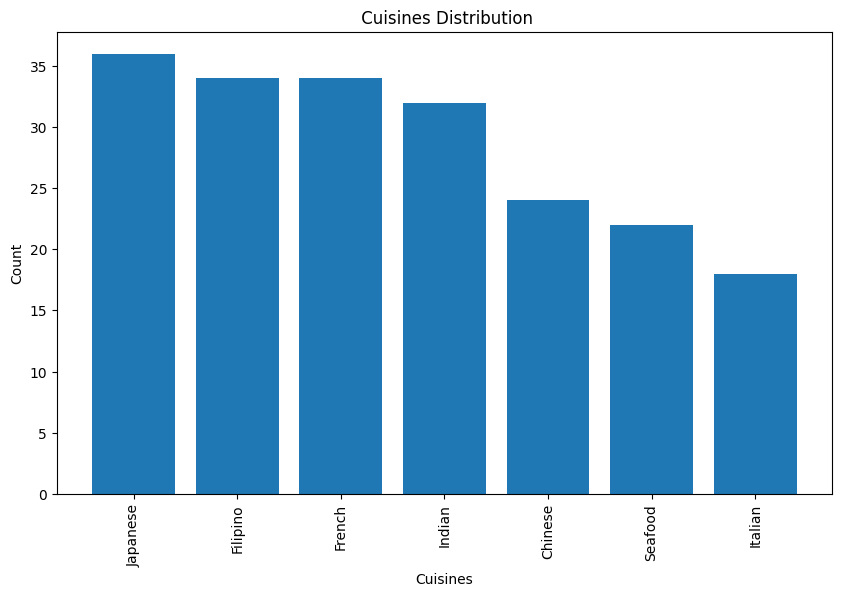

In [23]:
use_features = ['Location', 'Gender', 'Marital Status', 'Activity', 'Cuisines']

for f in use_features:
    plot_counts(f)

#### Bad habits impact

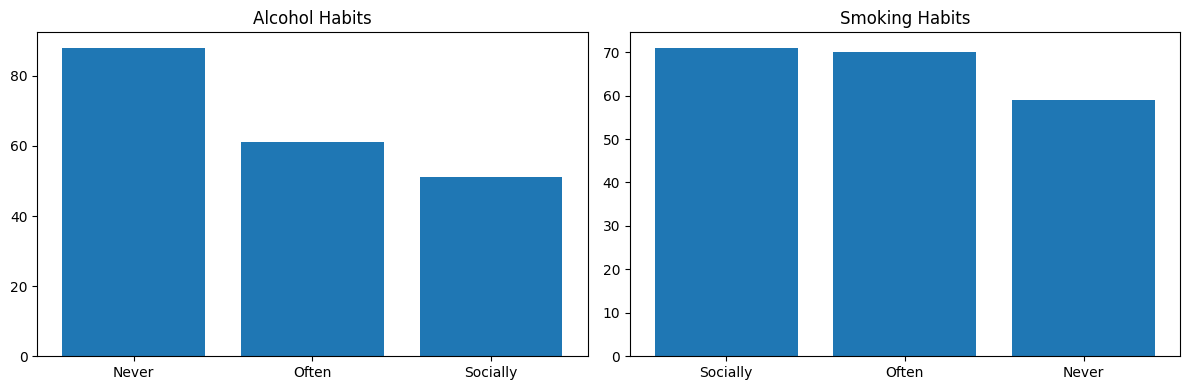

In [29]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
alcohol_counts = data['Alcohol '].value_counts()
plt.bar(alcohol_counts.index, alcohol_counts.values)
plt.title('Alcohol Habits')

plt.subplot(1, 2, 2)
smoking_counts = data['Smoker'].value_counts()
plt.bar(smoking_counts.index, smoking_counts.values)
plt.title('Smoking Habits')

plt.tight_layout()
plt.show()

#### ALL ratings distribution

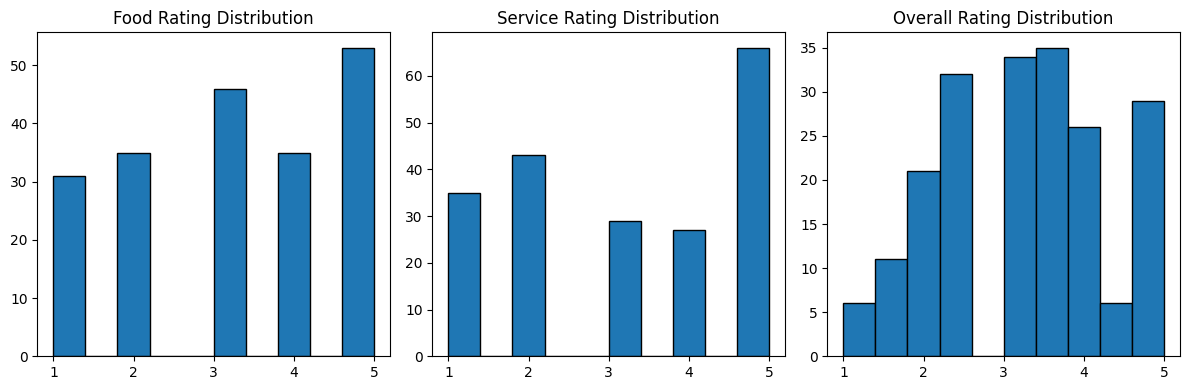

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data['Food Rating'], bins=10, edgecolor='black')
plt.title('Food Rating Distribution')

plt.subplot(1, 3, 2)
plt.hist(data['Service Rating'], bins=10, edgecolor='black')
plt.title('Service Rating Distribution')

plt.subplot(1, 3, 3)
plt.hist(data['Overall Rating'], bins=10, edgecolor='black')
plt.title('Overall Rating Distribution')

plt.tight_layout()
plt.show()

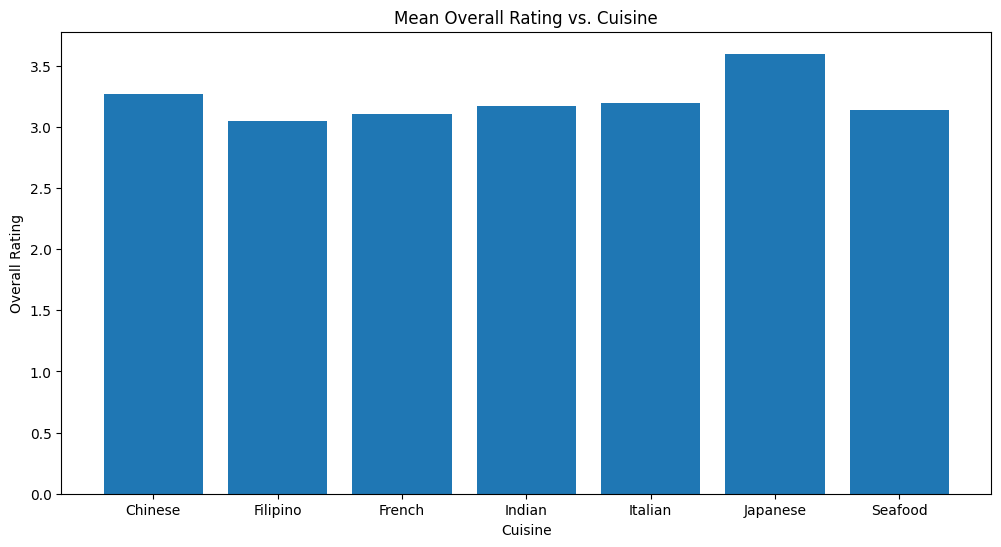

In [33]:
# Plot: Overall Rating vs. Cuisine
plt.figure(figsize=(12, 6))
cuisine_rating = data.groupby('Cuisines')['Overall Rating'].mean().reset_index()
plt.bar(cuisine_rating['Cuisines'], cuisine_rating['Overall Rating'])
#plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Overall Rating')
plt.title('Mean Overall Rating vs. Cuisine')
plt.show()

In [39]:
def plot_overall_rating(cuisine_data, features):
    num_plots = len(features)
    rows = (num_plots + 2) // 3  # Calculate the number of rows needed
    cols = 2  # Set the number of columns to 3

    fig, axs = plt.subplots(rows, cols, figsize=(18, 6 * rows))
    axs = axs.flatten()  # Flatten the array of subplots

    for i, feature in enumerate(features):
        if feature in cuisine_data.columns:
            rating_data = cuisine_data.groupby(feature)['Overall Rating'].mean().reset_index()
            axs[i].bar(rating_data[feature], rating_data['Overall Rating'])
            axs[i].set_xlabel(feature)
            axs[i].set_ylabel('Overall Rating')
            axs[i].set_title(f'Overall Rating vs. {feature}')
            axs[i].tick_params(axis='x', rotation=90)
        else:
            axs[i].set_visible(False)

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

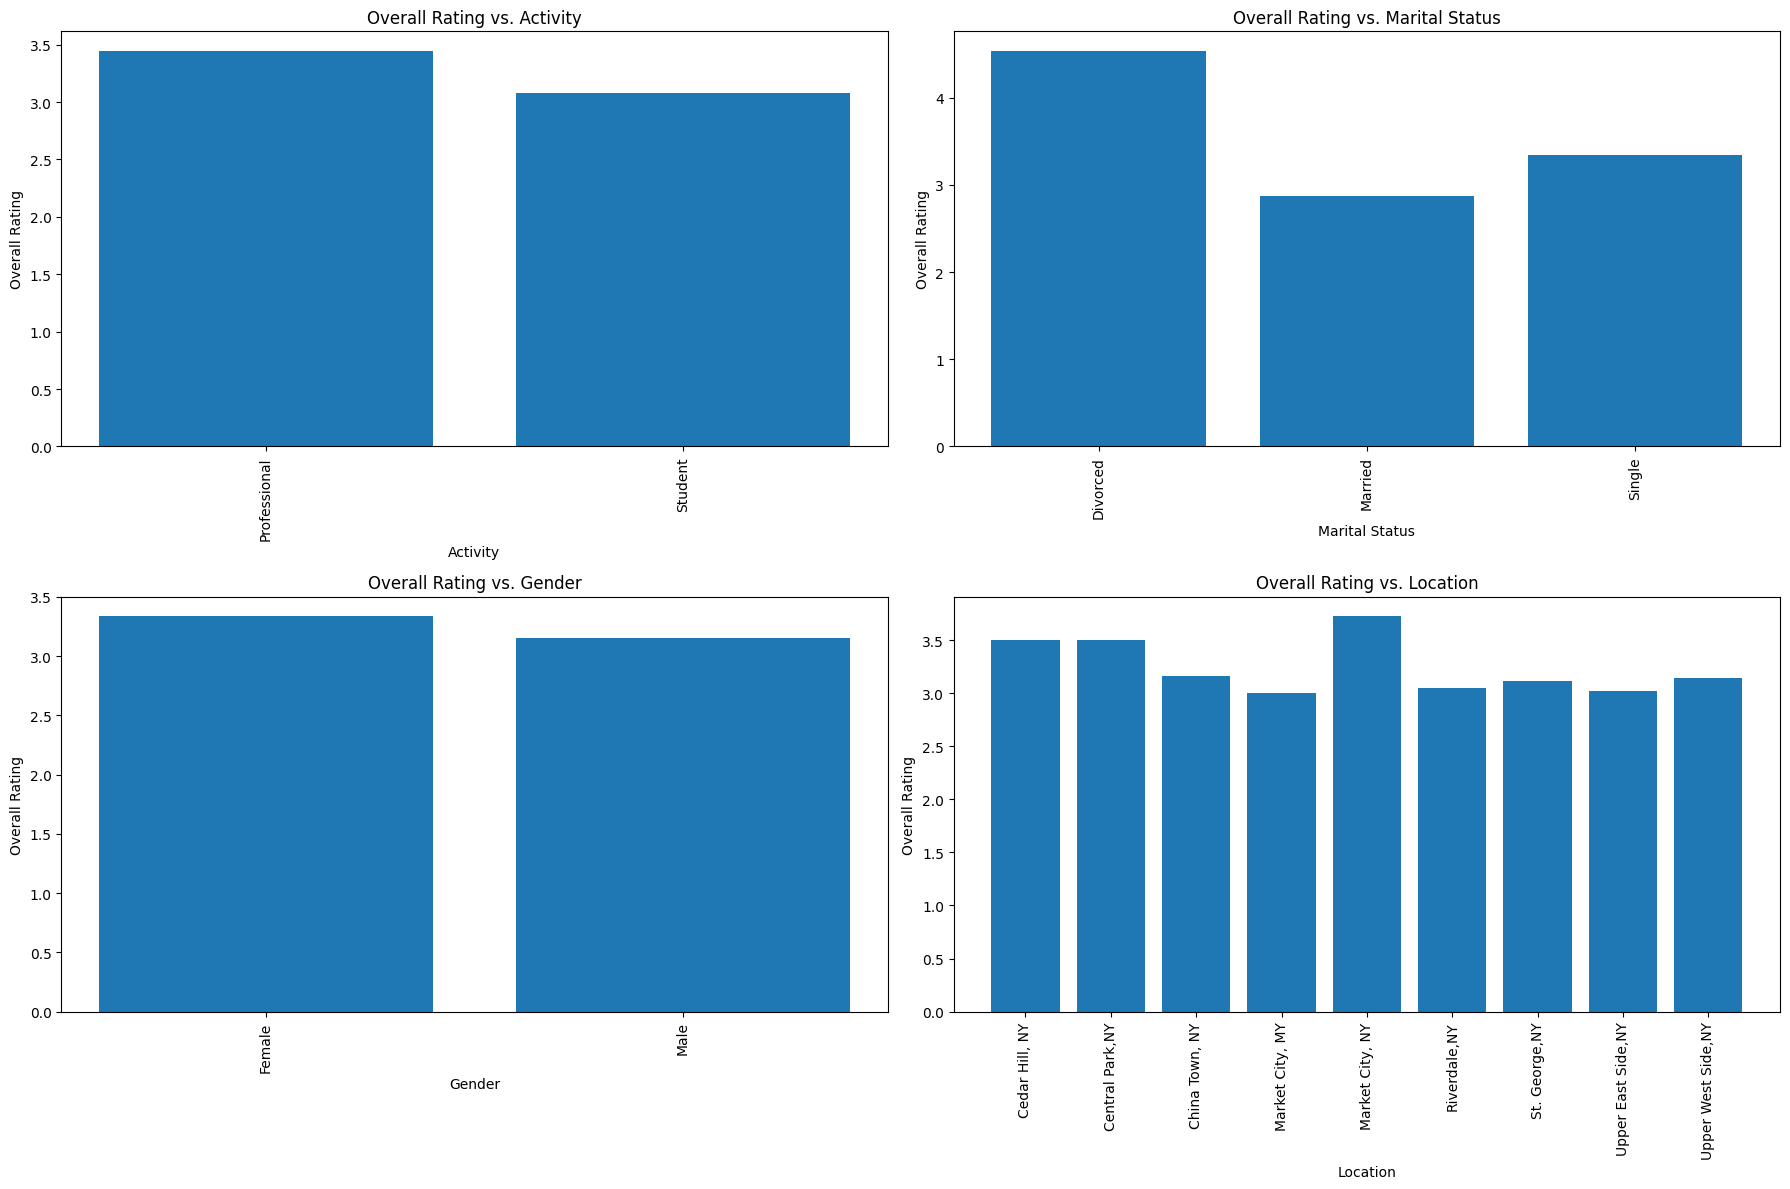

In [40]:
features_list = [ 'Activity', 'Marital Status', 'Gender', 'Location']
plot_overall_rating(data, features_list)